**Curso Aprendiza Automatico**

Prof. Felipe Meza

Estudiante: Sergio Castillo <sergio.cs87@yahoo.com>

*Tarea 4 - 19 agosto 2019*


Pruebas de parámetros de redes neuronales

# Predicción de admisiones estudiantiles con KERAS.

## Mi primera red neuronal ?

Información de la UCLA basada en 3 datos:

   - GRE Scores (Test)
   - GPA Scores (Grades)
   - Class rank (1-4)

El dataset original se encuentra en: http://www.ats.ucla.edu/ y en este mismo apartado corresponde al file *binary.csv* extraido directaemten del sitio.

Debe tener instalado en el ambiente de trabajo Pandas, Keras etc.

# 1. Carga y vizualización de datos:

Para cargar los datos usamos load the data, usaremos un paquete de datos muy útil llamado Pandas. Puede leer en la documentación de Pandas aquí: https://pandas.pydata.org/


In [2]:
import pandas as pd
data = pd.read_csv('https://stats.idre.ucla.edu/stat/data/binary.csv')
print(data)

     admit  gre   gpa  rank
0        0  380  3.61     3
1        1  660  3.67     3
2        1  800  4.00     1
3        1  640  3.19     4
4        0  520  2.93     4
5        1  760  3.00     2
6        1  560  2.98     1
7        0  400  3.08     2
8        1  540  3.39     3
9        0  700  3.92     2
10       0  800  4.00     4
11       0  440  3.22     1
12       1  760  4.00     1
13       0  700  3.08     2
14       1  700  4.00     1
15       0  480  3.44     3
16       0  780  3.87     4
17       0  360  2.56     3
18       0  800  3.75     2
19       1  540  3.81     1
20       0  500  3.17     3
21       1  660  3.63     2
22       0  600  2.82     4
23       0  680  3.19     4
24       1  760  3.35     2
25       1  800  3.66     1
26       1  620  3.61     1
27       1  520  3.74     4
28       1  780  3.22     2
29       0  520  3.29     1
..     ...  ...   ...   ...
370      1  540  3.77     2
371      1  680  3.76     3
372      1  680  2.42     1
373      1  620  3.3

### Visualización de datos:

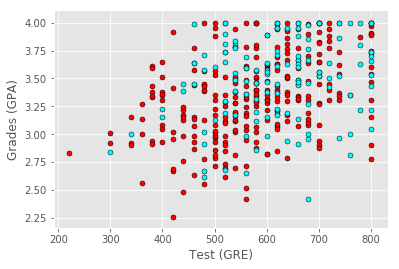

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import numpy as np
def plot_points(data):
    X = np.array(data[["gre","gpa"]])
    y = np.array(data["admit"])
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'red', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'cyan', edgecolor = 'k')
    plt.xlabel('Test (GRE)')
    plt.ylabel('Grades (GPA)')
plot_points(data)
plt.show()

En apariencia GRADES y TEST no parecen tener relación clara.

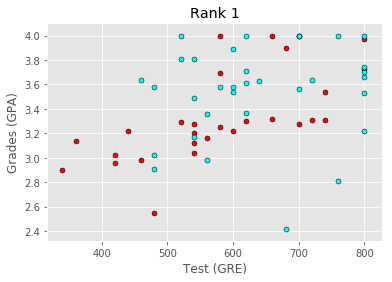

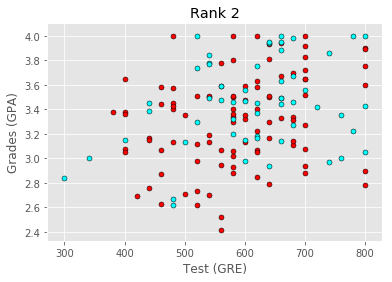

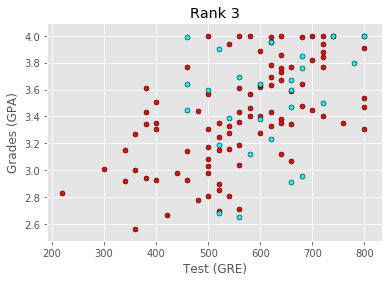

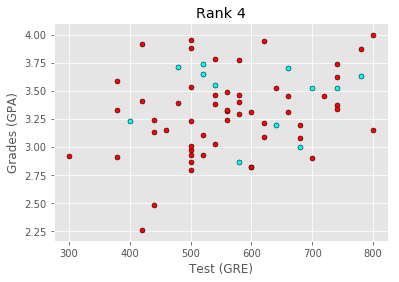

In [4]:
data_rank1 = data[data["rank"]==1]
data_rank2 = data[data["rank"]==2]
data_rank3 = data[data["rank"]==3]
data_rank4 = data[data["rank"]==4]
plot_points(data_rank1)
plt.title("Rank 1")
plt.show()
plot_points(data_rank2)
plt.title("Rank 2")
plt.show()
plot_points(data_rank3)
plt.title("Rank 3")
plt.show()
plot_points(data_rank4)
plt.title("Rank 4")
plt.show()

Parece ser que por RANK la relación es un poco más clara en algunos casos, se procede a construir una MLP con RANK, GRE y GPA.

# 2. Procesado de datos:

- Se remueven NaNs
- One-hot encode con rank
- Normalizacion de GRE y GPA, de manera que queden en el rango (0,1)
- Se parten los datos en input X - labels y

In [0]:
import keras
from keras.utils import np_utils

# remove NaNs
data = data.fillna(0)

# One-hot encoding the rank
processed_data = pd.get_dummies(data, columns=['rank'])

# Normalizing the gre and the gpa scores to be in the interval (0,1)
processed_data["gre"] = processed_data["gre"]/800
processed_data["gpa"] = processed_data["gpa"]/4

# Splitting the data input into X, and the labels y 
X = np.array(processed_data)[:,1:]
X = X.astype('float32')
y = keras.utils.to_categorical(data["admit"],2)

In [6]:
# Checking that the input and output look correct
print("Shape of X:", X.shape)
print("\nShape of y:", y.shape)
print("\nFirst 10 rows of X")
print(X[:10])
print("\nFirst 10 rows of y")
print(y[:10])

Shape of X: (400, 6)

Shape of y: (400, 2)

First 10 rows of X
[[0.475  0.9025 0.     0.     1.     0.    ]
 [0.825  0.9175 0.     0.     1.     0.    ]
 [1.     1.     1.     0.     0.     0.    ]
 [0.8    0.7975 0.     0.     0.     1.    ]
 [0.65   0.7325 0.     0.     0.     1.    ]
 [0.95   0.75   0.     1.     0.     0.    ]
 [0.7    0.745  1.     0.     0.     0.    ]
 [0.5    0.77   0.     1.     0.     0.    ]
 [0.675  0.8475 0.     0.     1.     0.    ]
 [0.875  0.98   0.     1.     0.     0.    ]]

First 10 rows of y
[[1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]]


# 3. Partición de los datos en training y testing:

In [7]:
# break training set into training and validation sets
(X_train, X_test) = X[50:], X[:50]
(y_train, y_test) = y[50:], y[:50]

# print shape of training set
print('x_train shape:', X_train.shape)

# print number of training, validation, and test images
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

x_train shape: (350, 6)
350 train samples
50 test samples


# 4. Definición de la arquitectura de la red neuronal:

In [8]:
# Imports
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.utils import np_utils

# Building the model
# Note that filling out the empty rank as "0", gave us an extra column, for "Rank 0" students.
# Thus, our input dimension is 7 instead of 6.

model = Sequential()

model.add(Dense(128, input_dim=6))
model.add(Activation('relu'))

model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(2))
model.add(Activation('sigmoid'))

    
# Compiling the model
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

W0815 06:18:55.976720 140708435908480 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0815 06:18:56.017447 140708435908480 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0815 06:18:56.025203 140708435908480 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0815 06:18:56.062979 140708435908480 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0815 06:18:56.095129 140708435908480 deprecation_wrappe

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               896       
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
activation_2 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 130       
_________________________________________________________________
activation_3 (Activation)    (None, 2)                 0         
Total params: 9,282
Trainable params: 9,282
Non-trainable params: 0
_________________________________________________________________


# 5. Entrenamiento del modelo:

In [9]:
# Training the model
model.fit(X_train, y_train, epochs=200, batch_size=100, verbose=0)
#model.fit(X_train, y_train, epochs=1000, batch_size=100, verbose=0)

W0815 06:18:56.219431 140708435908480 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0815 06:18:56.270709 140708435908480 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



# 6. Score del modelo:

In [10]:
# Evaluating the model on the training and testing set
score = model.evaluate(X_train, y_train)
print("\n Training Accuracy:", score[1])
score = model.evaluate(X_test, y_test)
print("\n Testing Accuracy:", score[1])

350/350 [==============================] - 0s 121us/step

 Training Accuracy: 0.7114285734721593
50/50 [==============================] - 0s 120us/step

 Testing Accuracy: 0.6400000095367432


# 7. Play with parameters!

- Activation function: relu and sigmoid
- Loss function: categorical_crossentropy, mean_squared_error
- Optimizer: rmsprop, adam, ada



Un pequeño ejercicio agregando dropout...

In [11]:
model = Sequential()

model.add(Dense(128, input_dim=6))
model.add(Activation('relu'))
model.add(Dropout(.5)) # now using dropout

model.add(Dense(64))
model.add(Activation('relu'))
#model.add(Dropout(.5)) # now using dropout

model.add(Dense(32))
model.add(Activation('relu'))
#model.add(Dropout(.5)) # now using dropout

model.add(Dense(16))
model.add(Activation('relu'))
#model.add(Dropout(.5)) # now using dropout

model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss = 'categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])
#model.summary()

# Training the model
#model.fit(X_train, y_train, epochs=200, batch_size=100, verbose=0)
model.fit(X_train, y_train, epochs=500, batch_size=100, verbose=0)

# Evaluating the model on the training and testing set
score = model.evaluate(X_train, y_train)
print("\n Training Accuracy:", score[1])
score = model.evaluate(X_test, y_test)
print("\n Testing Accuracy:", score[1])



W0815 06:19:02.501223 140708435908480 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


350/350 [==============================] - 0s 196us/step

 Training Accuracy: 0.7142857163293022
50/50 [==============================] - 0s 111us/step

 Testing Accuracy: 0.6600000095367432


In [12]:
model = Sequential()

model.add(Dense(100, input_dim=6))
model.add(Activation('relu'))
model.add(Dropout(.5)) # now using dropout

model.add(Dense(100))
model.add(Activation('relu'))
#model.add(Dropout(.5)) # now using dropout

model.add(Dense(2))
model.add(Activation('relu'))
#model.add(Dropout(.5)) # now using dropout


model.compile(loss = 'categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])
#model.summary()

# Training the model
#model.fit(X_train, y_train, epochs=200, batch_size=100, verbose=0)
model.fit(X_train, y_train, epochs=500, batch_size=200, verbose=0)

# Evaluating the model on the training and testing set
score = model.evaluate(X_train, y_train)
print("\n Training Accuracy:", score[1])
score = model.evaluate(X_test, y_test)
print("\n Testing Accuracy:", score[1])



350/350 [==============================] - 0s 254us/step

 Training Accuracy: 0.7142857163293022
50/50 [==============================] - 0s 136us/step

 Testing Accuracy: 0.6600000095367432


A continuacion utilizaremos el GridSearch de ScikitLearn para testear el modelo utilizando diferentes combinaciones de hiperparametros a la vez, de una forma mucho mas rapida y automatizada que haciendolo manualmente.

El proceso prueba todas las combinaciones de los parametros indicados utilizando paralelismo (corriendo un train execution por core) hasta agotar las opciones y guardará el resultado.

Al final se elije el mejor y se muestra el sumario del resto de los resultados.

Los parametros seleccionados asi como sus distintos valores de prueba fueron tomados de esta referencia: https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/

In [34]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm

def create_model(neurons=5, 
                 dropout_rate=0.0, 
                 weight_constraint=0, 
                 activation='relu', 
                 init_mode='uniform',
                 learn_rate=0.01, 
                 momentum=0):
  model = Sequential()

  model.add(Dense(neurons, 
                  input_dim=6, 
                  activation=activation, 
                  kernel_initializer=init_mode, 
                  kernel_constraint=maxnorm(weight_constraint)))
  model.add(Dropout(dropout_rate))
  model.add(Dense(2, kernel_initializer=init_mode, activation='sigmoid'))

  optimizer = SGD(lr=learn_rate, momentum=momentum)
  model.compile(loss = 'categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  return model

#Crear el modelo
model = KerasClassifier(build_fn=create_model, verbose=0)

#Definir los parametros a utilizar con grid search
batch_size = [50] # [10, 20, 50, 75, 100] se comenta y se usa el mejor resultado
epochs = [500] # [10, 50, 100, 500] se comenta y se usa el mejor resultado
neurons = [100] # [10, 25, 50, 100, 150] # same as above
weight_constraint = [1] # [1, 2, 3, 4, 5]
dropout_rate = [0.0] # [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
activation = ['relu'] # ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
init_mode = ['glorot_uniform'] # ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
learn_rate = [0.1] # [0.001, 0.01, 0.1, 0.2, 0.3]
momentum = [0.6] # [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]

param_grid = dict(
    batch_size=batch_size, 
    epochs=epochs, 
    neurons=neurons, 
    dropout_rate=dropout_rate, 
    weight_constraint=weight_constraint,
    activation=activation,
    init_mode=init_mode,
    learn_rate=learn_rate, 
    momentum=momentum)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)  #utilizar paralelismo
grid_result = grid.fit(X_train, y_train)

#Sumarizar los resultados
print("Mejor: %f usando %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) con: %r" % (mean, stdev, param))


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Mejor: 0.720000 usando {'activation': 'relu', 'batch_size': 50, 'dropout_rate': 0.0, 'epochs': 500, 'init_mode': 'glorot_uniform', 'learn_rate': 0.1, 'momentum': 0.6, 'neurons': 100, 'weight_constraint': 1}
0.720000 (0.035184) con: {'activation': 'relu', 'batch_size': 50, 'dropout_rate': 0.0, 'epochs': 500, 'init_mode': 'glorot_uniform', 'learn_rate': 0.1, 'momentum': 0.6, 'neurons': 100, 'weight_constraint': 1}


La combinacion de resultados dejados en el codigo anterior para la muestra es la que demostró tener los mejores resultados.

Como notas es importante indicar que cada parametro fue probado individualmente para conseguir el mejor valor, el cual era mantenido para la búsqueda del siguiente parametro y asi consecutivamente. Se utilizo tambien algunas variaciones combinadas entre ellos.

Lo anterior se hizo de esta forma debido a que tratar de probar todos los parametros combinados al mismo tiempo requeriria cientos de ejecuciones de entrenamiento que requeririan de un poder de procesamiento muy alto y bastante tiempo de ejecucion, lo cual no era factible para este prueba.

Se decidio utilizar una sola capa oculta basado en el teorema de aproximación universal: https://en.wikipedia.org/wiki/Universal_approximation_theorem

De todos modos, al hacer pruebas preliminares con multiples capas no se demostro mejora alguna.